In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from matplotlib import colors
import matplotlib
import pylab as pl
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('cars.csv')
kmeans_data = data.fillna(0)
kmeans_data.brand = pd.Categorical(kmeans_data.brand)
kmeans_data['brand_categorical_variable'] = kmeans_data.brand.cat.codes


In [4]:
kmeans_data[:10]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,brand_categorical_variable
0,14.0,8,350.0,165,4209.0,12,1972,US.,2
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,0
2,17.0,8,302.0,140,3449.0,11,1971,US.,2
3,15.0,8,400.0,150,3761.0,10,1971,US.,2
4,30.5,4,98.0,63,2051.0,17,1978,US.,2
5,23.0,8,350.0,125,3900.0,17,1980,US.,2
6,13.0,8,351.0,158,4363.0,13,1974,US.,2
7,14.0,8,440.0,215,4312.0,9,1971,US.,2
8,25.4,5,183.0,77,3530.0,20,1980,Europe.,0
9,37.7,4,89.0,62,2050.0,17,1982,Japan.,1


In [5]:
columns = ['hp', 'time-to-60', 'brand_code', 'cubicinches']
features_to_be_included_4_kmeans = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60'] #'year' # 'brand_categorical_variable' ]

(array([20., 51., 47., 40., 36., 26., 22., 12.,  2.,  5.]),
 array([10.  , 13.66, 17.32, 20.98, 24.64, 28.3 , 31.96, 35.62, 39.28,
        42.94, 46.6 ]),
 <a list of 10 Patch objects>)

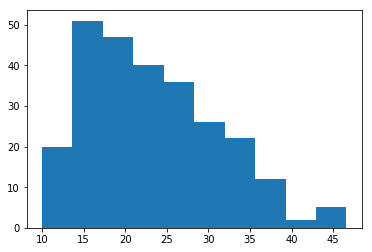

In [6]:
mpg = features_to_be_included_4_kmeans[0]
matplotlib.pyplot.hist(kmeans_data[mpg])

(array([  2.,   0., 125.,   0.,   3.,   0.,  55.,   0.,   0.,  76.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

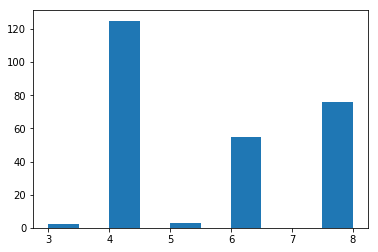

In [7]:
cylinders = features_to_be_included_4_kmeans[1]
matplotlib.pyplot.hist(kmeans_data[cylinders])

(array([ 2., 29., 84., 27., 18., 28., 30., 23., 12.,  8.]),
 array([  0. ,  45.5,  91. , 136.5, 182. , 227.5, 273. , 318.5, 364. ,
        409.5, 455. ]),
 <a list of 10 Patch objects>)

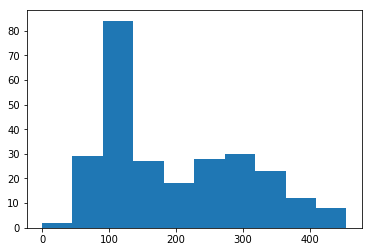

In [8]:
cubicinches = features_to_be_included_4_kmeans[2]
matplotlib.pyplot.hist(kmeans_data[cubicinches])

(array([21., 59., 75., 27., 13., 37.,  9., 10.,  2.,  8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

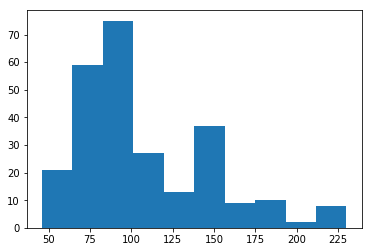

In [9]:
hp = features_to_be_included_4_kmeans[3]
matplotlib.pyplot.hist(kmeans_data[hp])

(array([ 3.,  0.,  0., 27., 59., 56., 39., 32., 33., 12.]),
 array([   0. ,  499.7,  999.4, 1499.1, 1998.8, 2498.5, 2998.2, 3497.9,
        3997.6, 4497.3, 4997. ]),
 <a list of 10 Patch objects>)

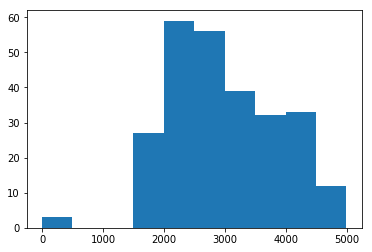

In [10]:
weightlbs = features_to_be_included_4_kmeans[4]
matplotlib.pyplot.hist(kmeans_data[weightlbs])

(array([ 4., 17., 41., 27., 84., 50., 17., 14.,  3.,  4.]),
 array([ 8. ,  9.7, 11.4, 13.1, 14.8, 16.5, 18.2, 19.9, 21.6, 23.3, 25. ]),
 <a list of 10 Patch objects>)

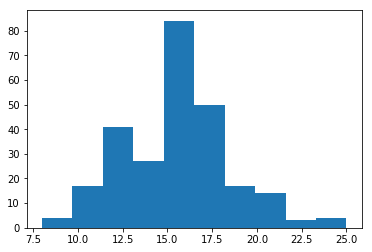

In [11]:
timeto60 = features_to_be_included_4_kmeans[5]
matplotlib.pyplot.hist(kmeans_data[timeto60])

In [39]:
## finding optimal number of clusters using Silhouttee coefficients and kmeans scores
silhoutte_coefficients = []
kmeans_scores = []
X = []
for i in range(1,11):
    model = KMeans( init='k-means++',n_clusters=i)
    data = kmeans_data[features_to_be_included_4_kmeans]
    kmeans = model.fit(data)
    label = kmeans.labels_
    if (i > 1):
        sil_coeff = silhouette_score(data, label, metric='euclidean')
    else:
        sil_coeff = 0
    score_from_kmeans_fit = kmeans.score(data)
    kmeans_scores.append(score_from_kmeans_fit)
    silhoutte_coefficients.append(sil_coeff)
    X.append(i)
    
    print("Number of Clusters = {}: The Silhouette Coefficient is {}\n Number of Clusters = {}: Score from Kmeans fit {}".format(i, sil_coeff,i, score_from_kmeans_fit))

Number of Clusters = 1: The Silhouette Coefficient is 0
 Number of Clusters = 1: Score from Kmeans fit -217921570.79685867
Number of Clusters = 2: The Silhouette Coefficient is 0.6192878770684911
 Number of Clusters = 2: Score from Kmeans fit -65171724.77474168
Number of Clusters = 3: The Silhouette Coefficient is 0.5599004358643473
 Number of Clusters = 3: Score from Kmeans fit -36715403.722278245
Number of Clusters = 4: The Silhouette Coefficient is 0.5659566141736562
 Number of Clusters = 4: Score from Kmeans fit -23634577.710977018
Number of Clusters = 5: The Silhouette Coefficient is 0.5875972257896802
 Number of Clusters = 5: Score from Kmeans fit -12360789.47238845
Number of Clusters = 6: The Silhouette Coefficient is 0.5570471331058945
 Number of Clusters = 6: Score from Kmeans fit -9007521.497233273
Number of Clusters = 7: The Silhouette Coefficient is 0.5412282296418959
 Number of Clusters = 7: Score from Kmeans fit -6675417.146012971
Number of Clusters = 8: The Silhouette Co

In [13]:
finalized_cluster_count = 2
model = KMeans( init='k-means++',n_clusters=finalized_cluster_count)
data = kmeans_data[features_to_be_included_4_kmeans]
kmeans = model.fit(data)
label = kmeans.labels_
sil_coeff = silhouette_score(data, label, metric='euclidean')
Score = kmeans.score(data)
print (Score)
print("Number of Clusters = {}, The Silhouette Coefficient is {}".format(finalized_cluster_count, sil_coeff))

-65171724.77474168
Number of Clusters = 2, The Silhouette Coefficient is 0.6192878770684911


In [14]:
finalized_cluster_count = 2
model = KMeans(n_clusters=finalized_cluster_count)
data = kmeans_data[features_to_be_included_4_kmeans]
kmeans = model.fit(data)
label = kmeans.labels_
sil_coeff = silhouette_score(data, label, metric='euclidean')
Score = kmeans.score(data)
print (Score)
print("Number of Clusters = {}, The Silhouette Coefficient is {}".format(finalized_cluster_count, sil_coeff))

-65171724.77474168
Number of Clusters = 2, The Silhouette Coefficient is 0.6192878770684911


In [15]:
kmeans_scores

[-217921570.79685867,
 -65171724.77474168,
 -36715403.722278245,
 -23310549.30053338,
 -12365589.202925976,
 -9007521.497233273,
 -6678743.06314318,
 -4964646.97478652,
 -3744918.693979968,
 -3147485.223658644]

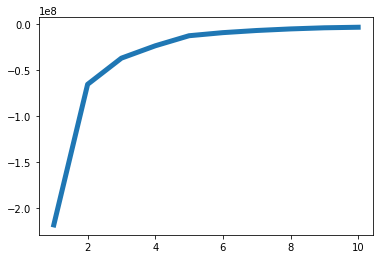

In [16]:
### Elbow method for plotting parameter K vs k-means score to compute optimal K value
L = matplotlib.pyplot.plot( X, kmeans_scores, linewidth=5)
## Elbow method shows there that k-means-score flatten at K = 5

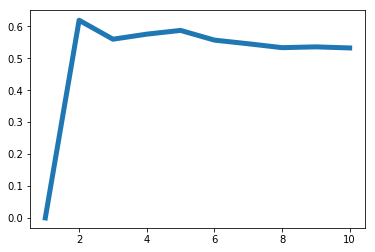

In [17]:
### plotting parameter K vs silhoutte score to compute optimal K value
SHS = matplotlib.pyplot.plot( X, silhoutte_coefficients, linewidth=5)
## Silhoutte scores range between -1 to 1. 
# Silhoutte scores promote cluster density and more distance between clusters.
## There are two silhoutte peaks at K=2 and K =5

In [18]:
# Although silhoutte has 2 peaks, 
#Based on silhoutte method and elbow method, we can choose K = 5 as optimal number of clusters

In [40]:
model = KMeans(n_clusters=5)
test_features= ['mpg','weightlbs']
features_to_be_included_4_kmeans= test_features;
data = kmeans_data[features_to_be_included_4_kmeans]
kmeans = model.fit(data)


In [41]:
predict_label_per_point = model.predict(data)
import collections
collections.Counter(predict_label_per_point)

Counter({0: 46, 1: 84, 2: 55, 3: 3, 4: 73})

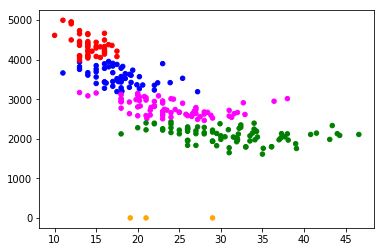

In [43]:
#mpg vs weight
color_map=['red', 'green', 'blue', 'orange', 'magenta']
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=predict_label_per_point, s=20, cmap=colors.ListedColormap(color_map))
plt.show()

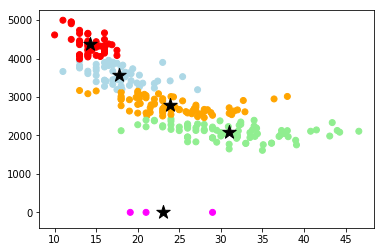

In [62]:
# There are 5 clusters, Counter({0: 46, 1: 72, 2: 56, 3: 84, 4: 3})
#0 = red (46 points)
#1 = blue 72 points
#2 = green (56 points)
#3 = orange (84 points)
#4 = magenta (3 points)
#mpg vs weight
color_map=['red', 'lightgreen', 'lightblue', 'magenta', 'orange']
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=predict_label_per_point, cmap=colors.ListedColormap(color_map))
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', s=200);
plt.show()